## Pulses Tutorial

### Pulse

#### Overview

The `Pulse` object represents the radio-frequency pulses that are used to control qubits. 
The new version of `Pulse` object includes the following changes:
- It includes a new attribute `finish` that returns the point in time when the pulse finishes (start + duration).
- The `phase` attribute was replaced with `relative_phase`, since taking care of the global sequence phase is now done by the `PulseSequence`.
- The attributes `offset_i` and `offset_q` included in the previous version were removed, as those are parameters of the instrument.


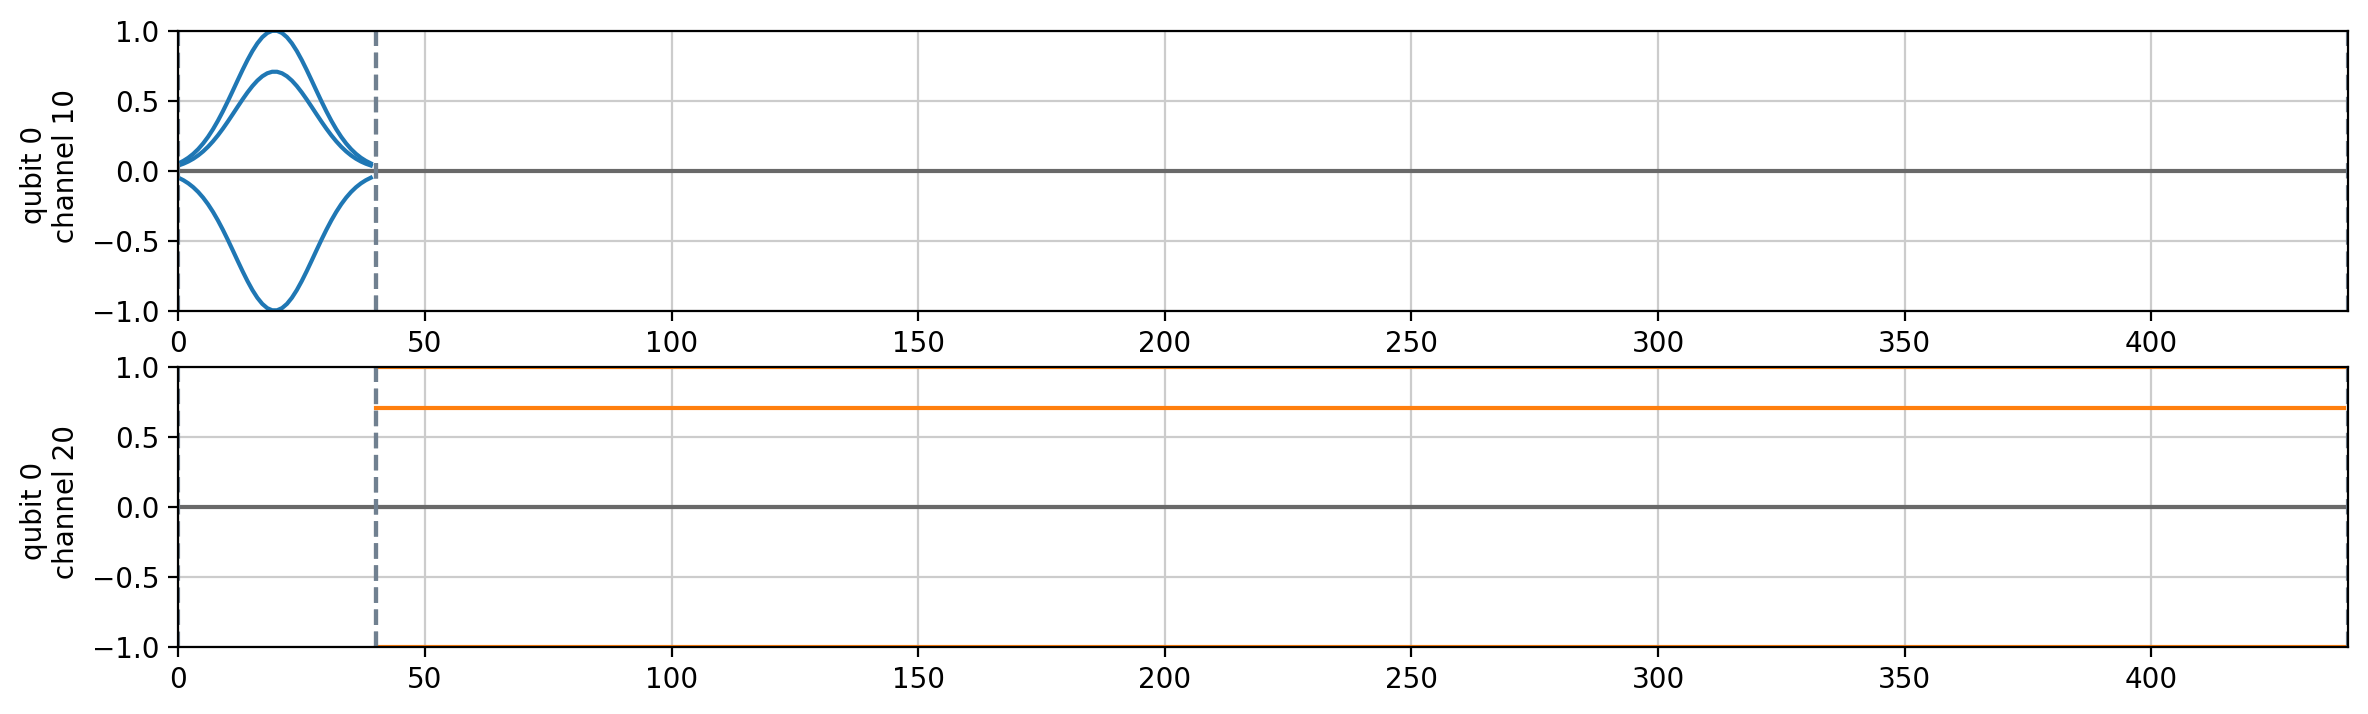

In [1]:
from qibolab.pulses import Pulse, ReadoutPulse, DrivePulse, FluxPulse
from qibolab.pulses import PulseShape, Rectangular, Gaussian, Drag, IIR, SNZ, eCap, Waveform

p0 = DrivePulse(start=0, 
                duration=40, 
                amplitude=1, 
                frequency=200e6, 
                relative_phase=0, 
                shape=Gaussian(5), 
                channel=10, 
                qubit=0)

p1 = ReadoutPulse(start=p0.duration,
                  duration=400,
                  amplitude=1, 
                  frequency=20e6, 
                  relative_phase=0,
                  shape=Rectangular(),
                  channel=20, 
                  qubit=0)
ps = p0 + p1
ps.plot()

If one of those variables change, the pulses that use them change automatically:

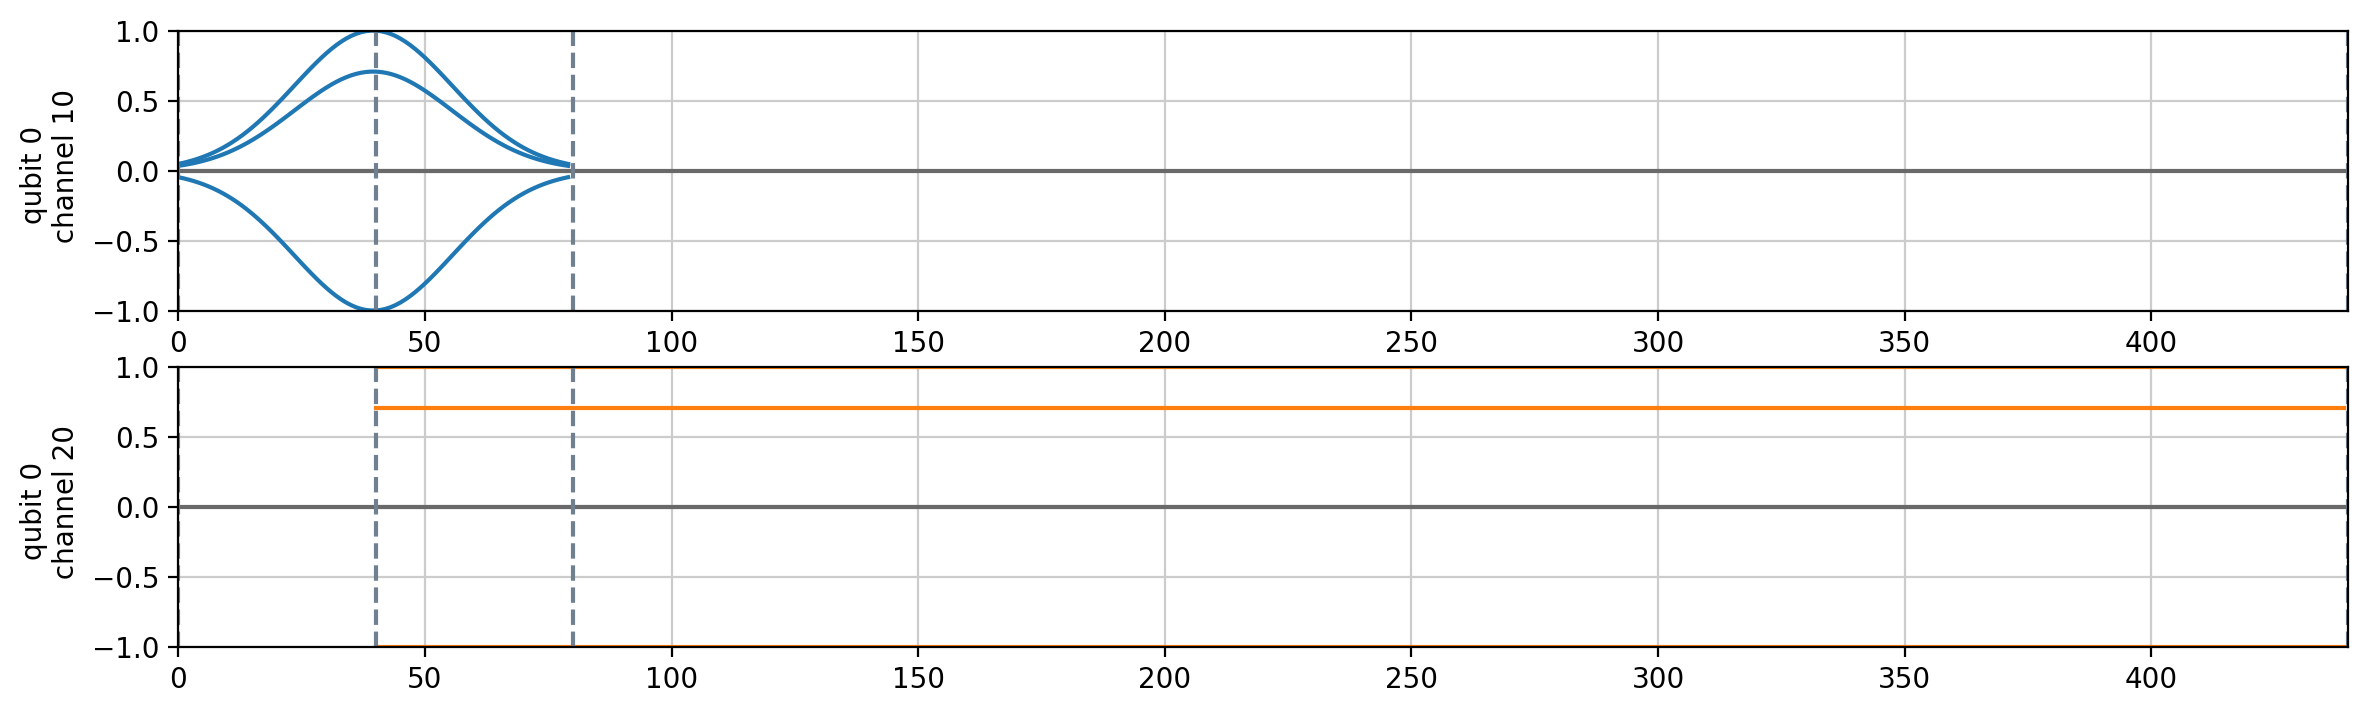

In [2]:
p0.duration = 80
ps.plot()

or

#### Initialisation

The main changes in the initialization of Pulse are those related to the changes in the attributes: 
```python
def __init__(self, start: int, duration: int, amplitude: float, 
                   frequency: int, relative_phase: float, shape: PulseShape | str,
                   channel: int | str, type: PulseType | str  = PulseType.DRIVE, qubit: int | str = 0):
``` 
The argument `phase` was replaced with `relative_phase`, the `shape` argument continues to support `PulseShape` objects or strings. `channel`and `qubit` support both integers or strings, and finally, the `type` argument supports a string or a constant from PulseType enumeration:
```python
class PulseType(Enum):
    READOUT = "ro"
    DRIVE = "qd"
    FLUX = "qf"
```

Pulse `type` and `qubit` are optional arguments, and default to `PulseType.DRIVE` and `0` respectively.

Below are some examples of Pulse initialization:

In [3]:
from qibolab.pulses import Pulse, ReadoutPulse, DrivePulse, FluxPulse
from qibolab.pulses import PulseShape, Rectangular, Gaussian, Drag
from qibolab.pulses import PulseType, PulseSequence
import numpy as np

In [4]:
# standard initialisation
p0 = Pulse(start = 0, 
        duration = 50, 
        amplitude = 0.9, 
        frequency = 20_000_000, 
        relative_phase = 0.0, 
        shape = Rectangular(), 
        channel = 0, 
        type = PulseType.READOUT, 
        qubit = 0)
assert repr(p0) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0, PulseType.READOUT, 0)'

In [5]:

# initialisation with str shape
p4 = Pulse(start = 0, 
        duration = 50, 
        amplitude = 0.9, 
        frequency = 20_000_000, 
        relative_phase = 0, 
        shape = 'Rectangular()', 
        channel = 0, 
        type = PulseType.READOUT, 
        qubit = 0)
assert repr(p4) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0, PulseType.READOUT, 0)'

In [6]:

# initialisation with str channel and str qubit
p5 = Pulse(start = 0, 
        duration = 50, 
        amplitude = 0.9, 
        frequency = 20_000_000, 
        relative_phase = 0, 
        shape = 'Rectangular()', 
        channel = 'channel0', 
        type = PulseType.READOUT, 
        qubit = 'qubit0')
assert repr(p5) == 'Pulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), channel0, PulseType.READOUT, qubit0)'
assert p5.qubit == 'qubit0'

In [7]:

# examples of initialisation with different frequencies, shapes and types
p6 = Pulse(0, 40, 0.9, -50e6, 0, Rectangular(), 0, PulseType.READOUT)
p7 = Pulse(0, 40, 0.9, 0, 0, Rectangular(), 0, PulseType.FLUX, 0)
p8 = Pulse(0, 40, 0.9, 50e6, 0, Gaussian(5), 0, PulseType.DRIVE, 2)
p9 = Pulse(0, 40, 0.9, 50e6, 0, Drag(5,2), 0, PulseType.DRIVE, 200)

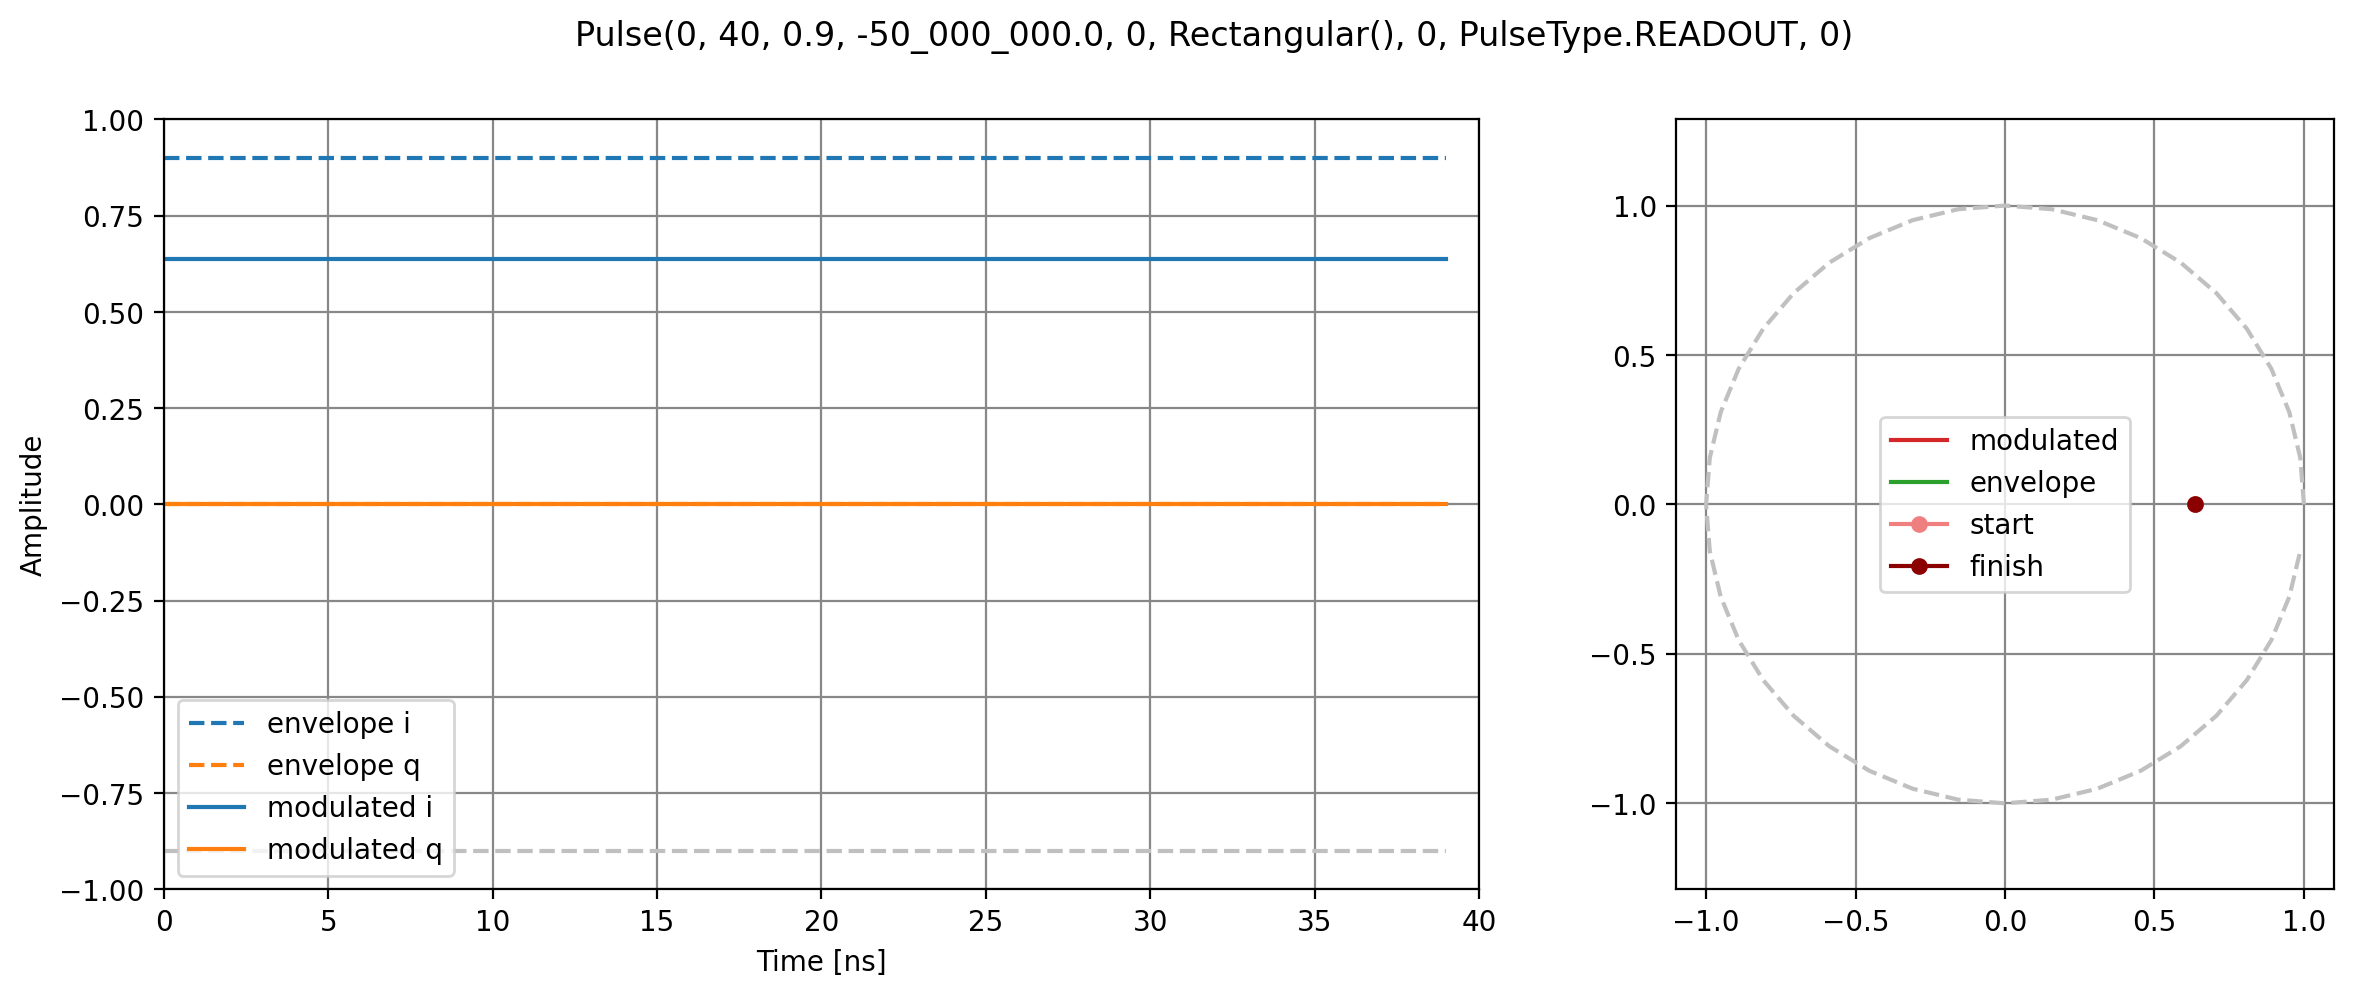

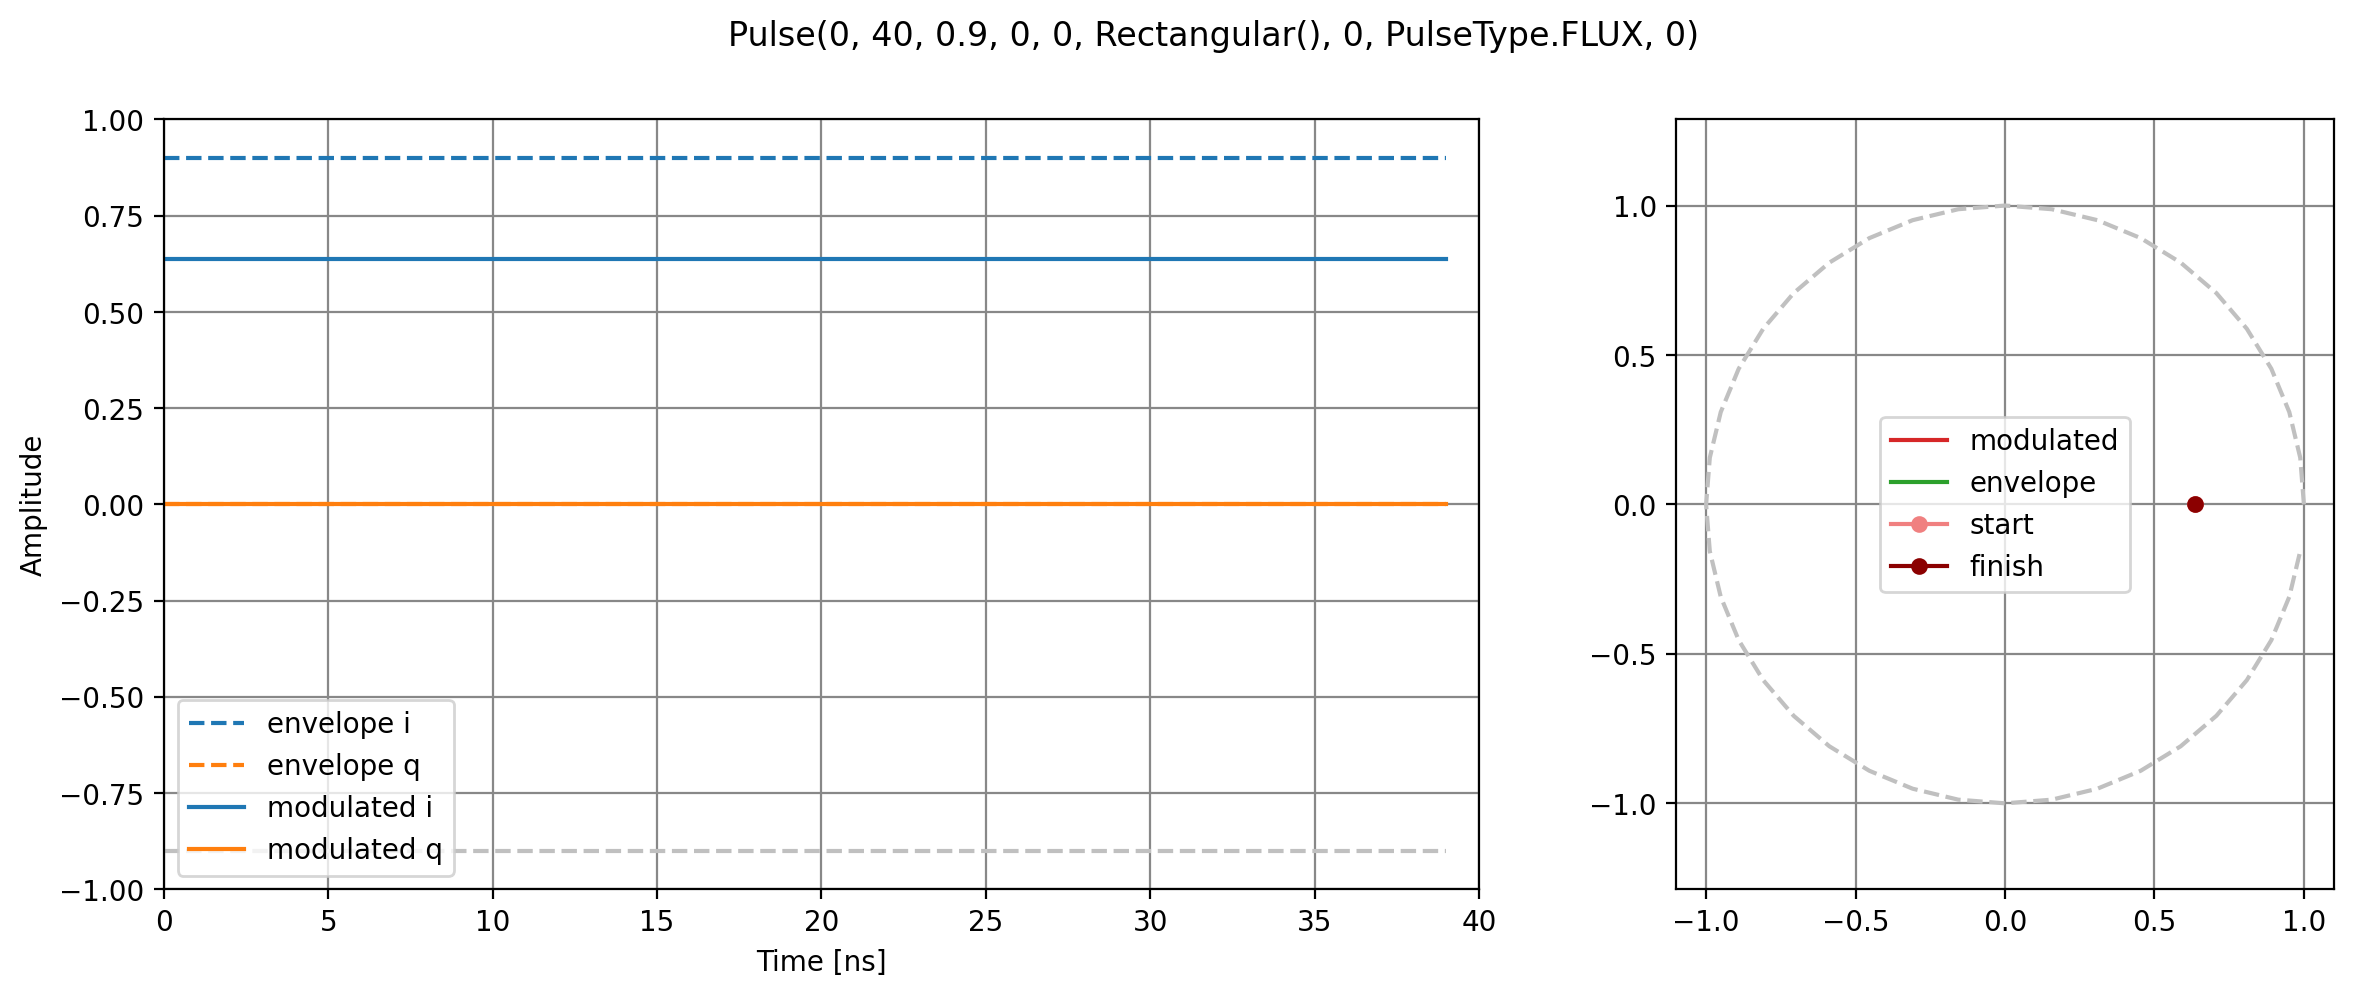

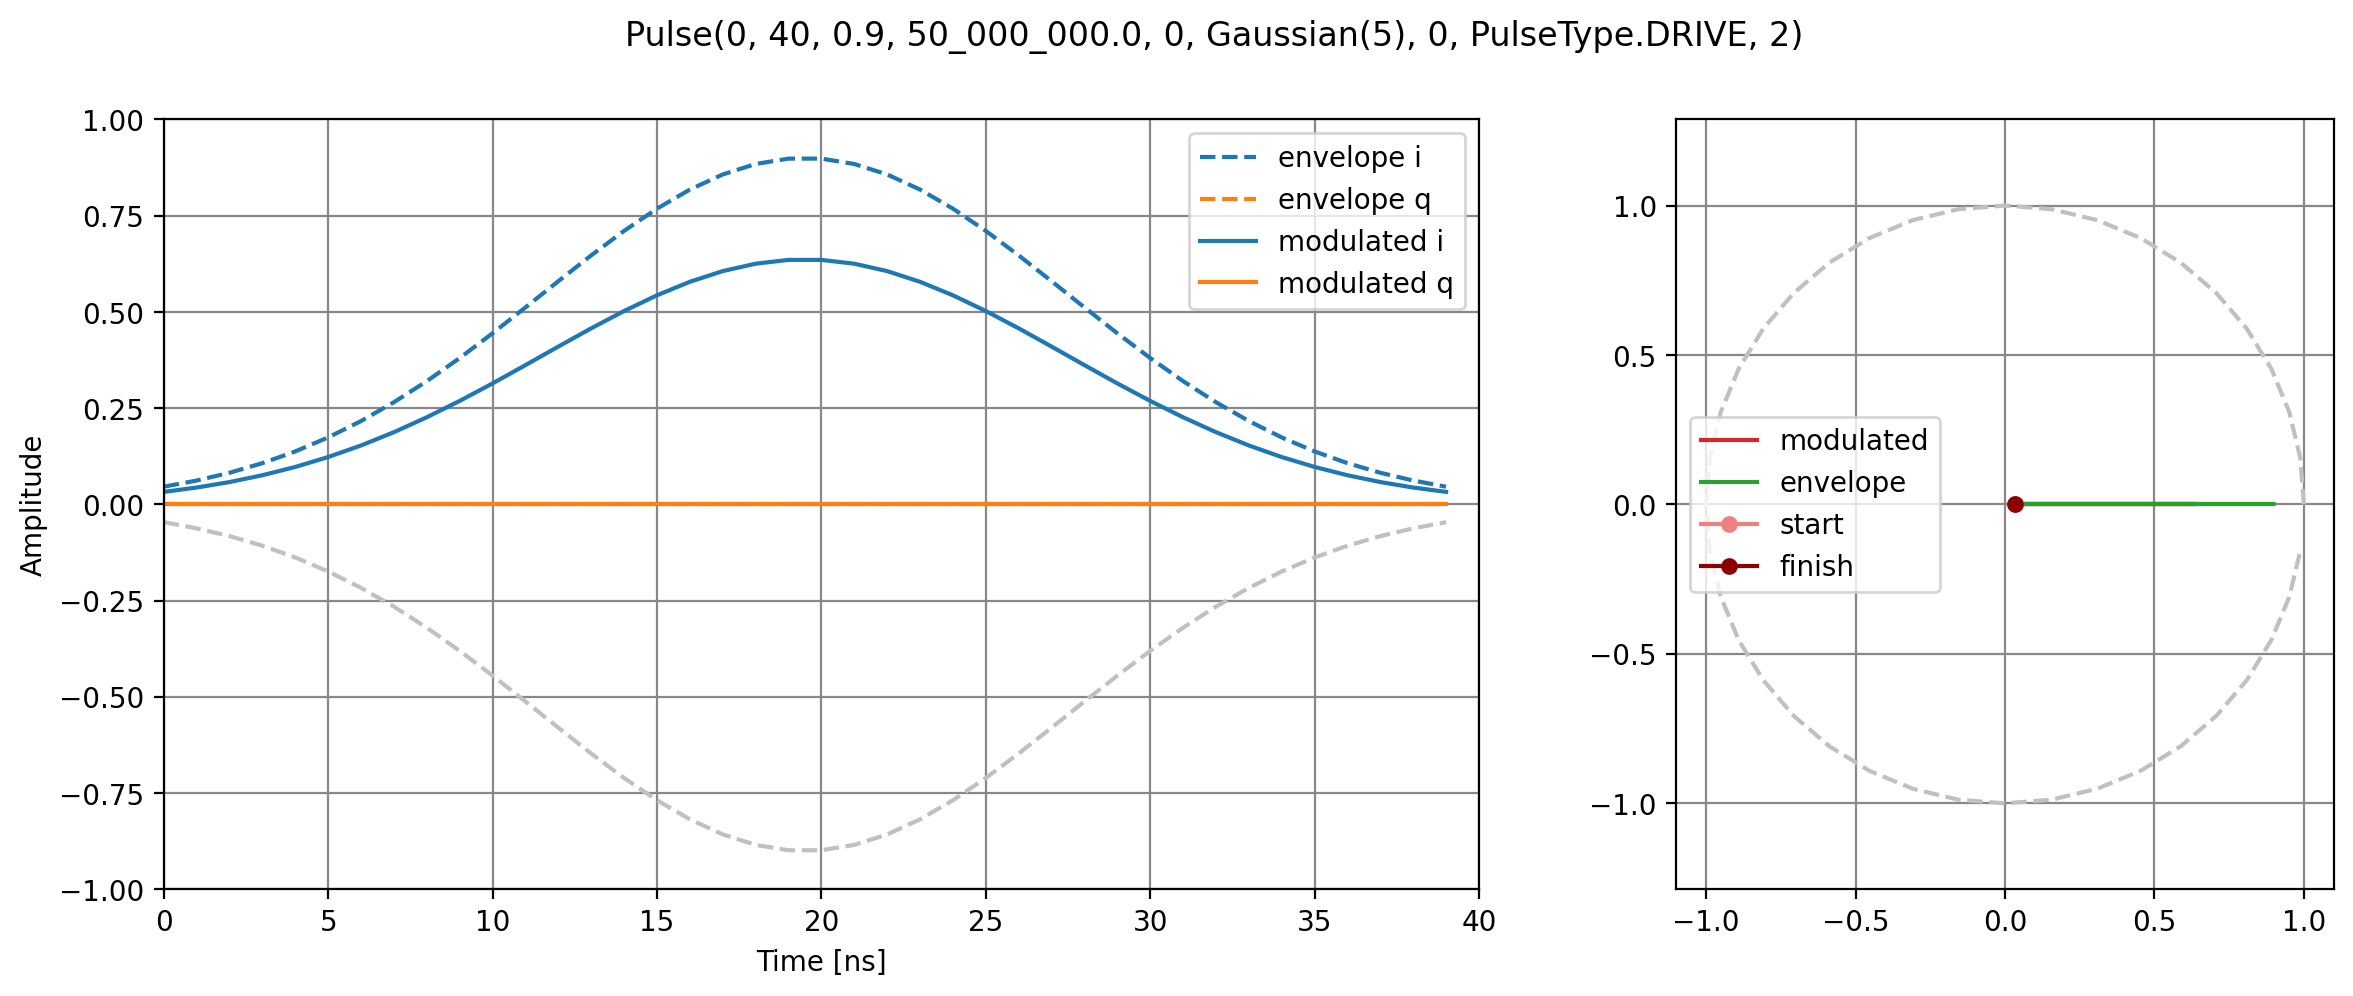

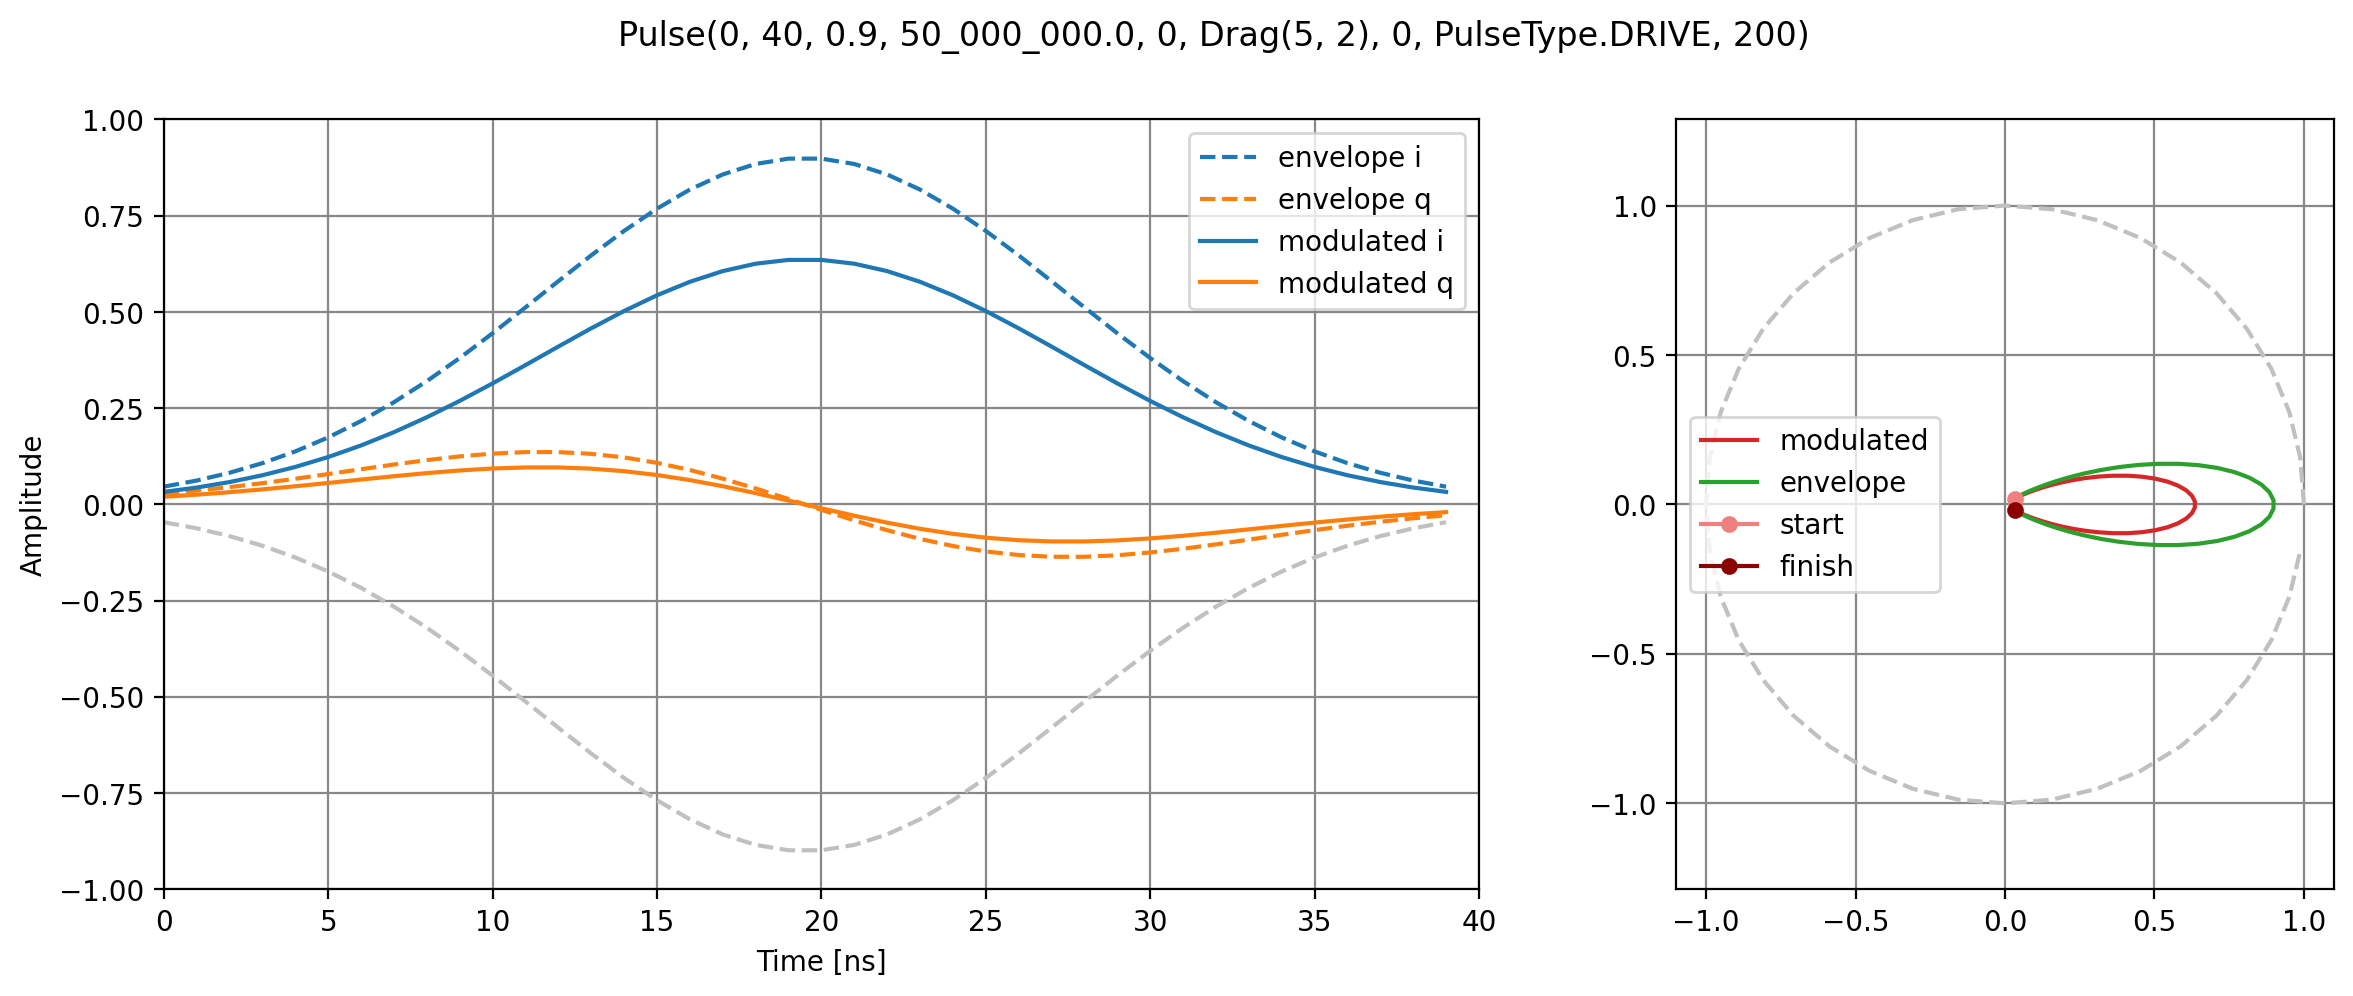

In [8]:
p6.plot()
p7.plot()
p8.plot()
p9.plot()

#### Attributes

Pulse implements these attributes:
- `start`
- `duration`
- `finish` (read only)
- `amplitude`
- `frequency`
- `relative_phase`
- `phase` (read only) returns the total phase of the pulse (global, based on its start + relative)
- `shape` a `PulseShape` object
- `channel`
- `type`
- `qubit`
- `serial` a str representation of the object
- `envelope_waveform_i` a Waveform object
- `envelope_waveform_q` a Waveform object
- `envelope_waveforms` a tuple of (Waveform, Waveform)
- `modulated_waveform_i` a Waveform object
- `modulated_waveform_q` a Waveform object
- `modulated_waveforms` a tuple of (Waveform, Waveform)

#### Methods

Pulse implements the following methods:
- `copy()` returns a deep copy of the object. The later changes to the original do not impact the replica.
- `shallow_copy()` returns a shallow copy of the object. The replica references to the same `start`, `duration` and `shape` objects.
The difference in the behaviour of these two methods can be appreciated in the below example:

In [9]:
p1 = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
p2 = p1.shallow_copy()
p3 = p1.copy()
assert p1 == p2
assert p1 == p3

#### Operators

Pulse now supports a small set of operators (`==`, `!=`, `+`, `*`).
Pulse is hashable, but not unmutable (its hash depends on the current value of its parameters), so one can use the following operators to compare pulses:

In [10]:
p0 = Pulse(0, 40, 1, 100e6, 0, Rectangular(), 0, PulseType.DRIVE, 0)
p1 = Pulse(100, 40, 1, 100e6, 0, Rectangular(), 0, PulseType.DRIVE, 0)
p2 = Pulse(0, 40, 1, 100e6, 0, Rectangular(), 0, PulseType.DRIVE, 0)

assert p0 != p1
assert p0 == p2

# If we change p1 start to 0 it become the same as p0
p1.start = 0
assert p0 == p1

Since it is hashable, it can also be used as keys of a dictionary:

In [11]:
rp = Pulse(0, 40, 0.9, 100e6, 0, Rectangular(), 0, PulseType.DRIVE)
dp = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)
hash(rp)
my_dict = {rp: 1, dp: 2}
assert list(my_dict.keys())[0] == rp
assert list(my_dict.keys())[1] == dp

Adding two Pulses returns a PulseSequence. Multiplying a Pulse by an integer n returns a PulseSequence with n deep copies of the original pulse.

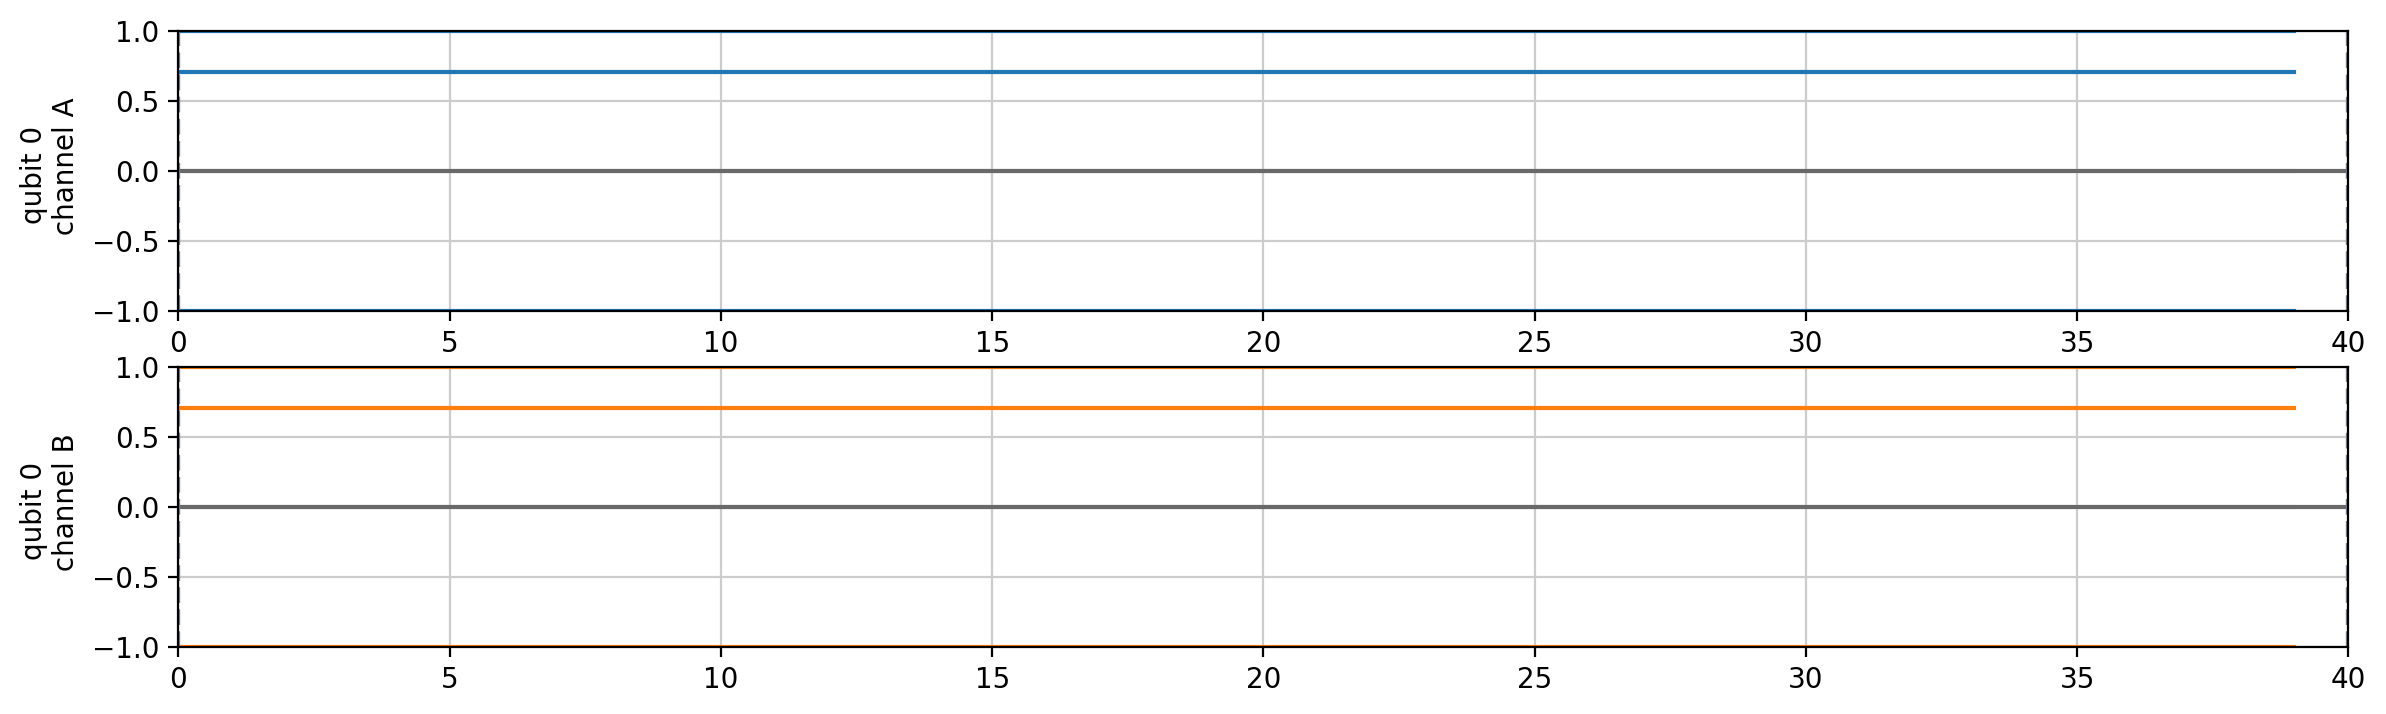

In [12]:
pA = Pulse(0, 40, 1, 100e6, 0, Rectangular(), 'A', PulseType.DRIVE, 0)
pB = Pulse(0, 40, 1, 100e6, 0, Rectangular(), 'B', PulseType.DRIVE, 0)
ps = pA + pB
assert type(ps) == PulseSequence
ps.plot()

As we have already seen, Pulse also implements a `plot()` method that represents the pulse waveforms:

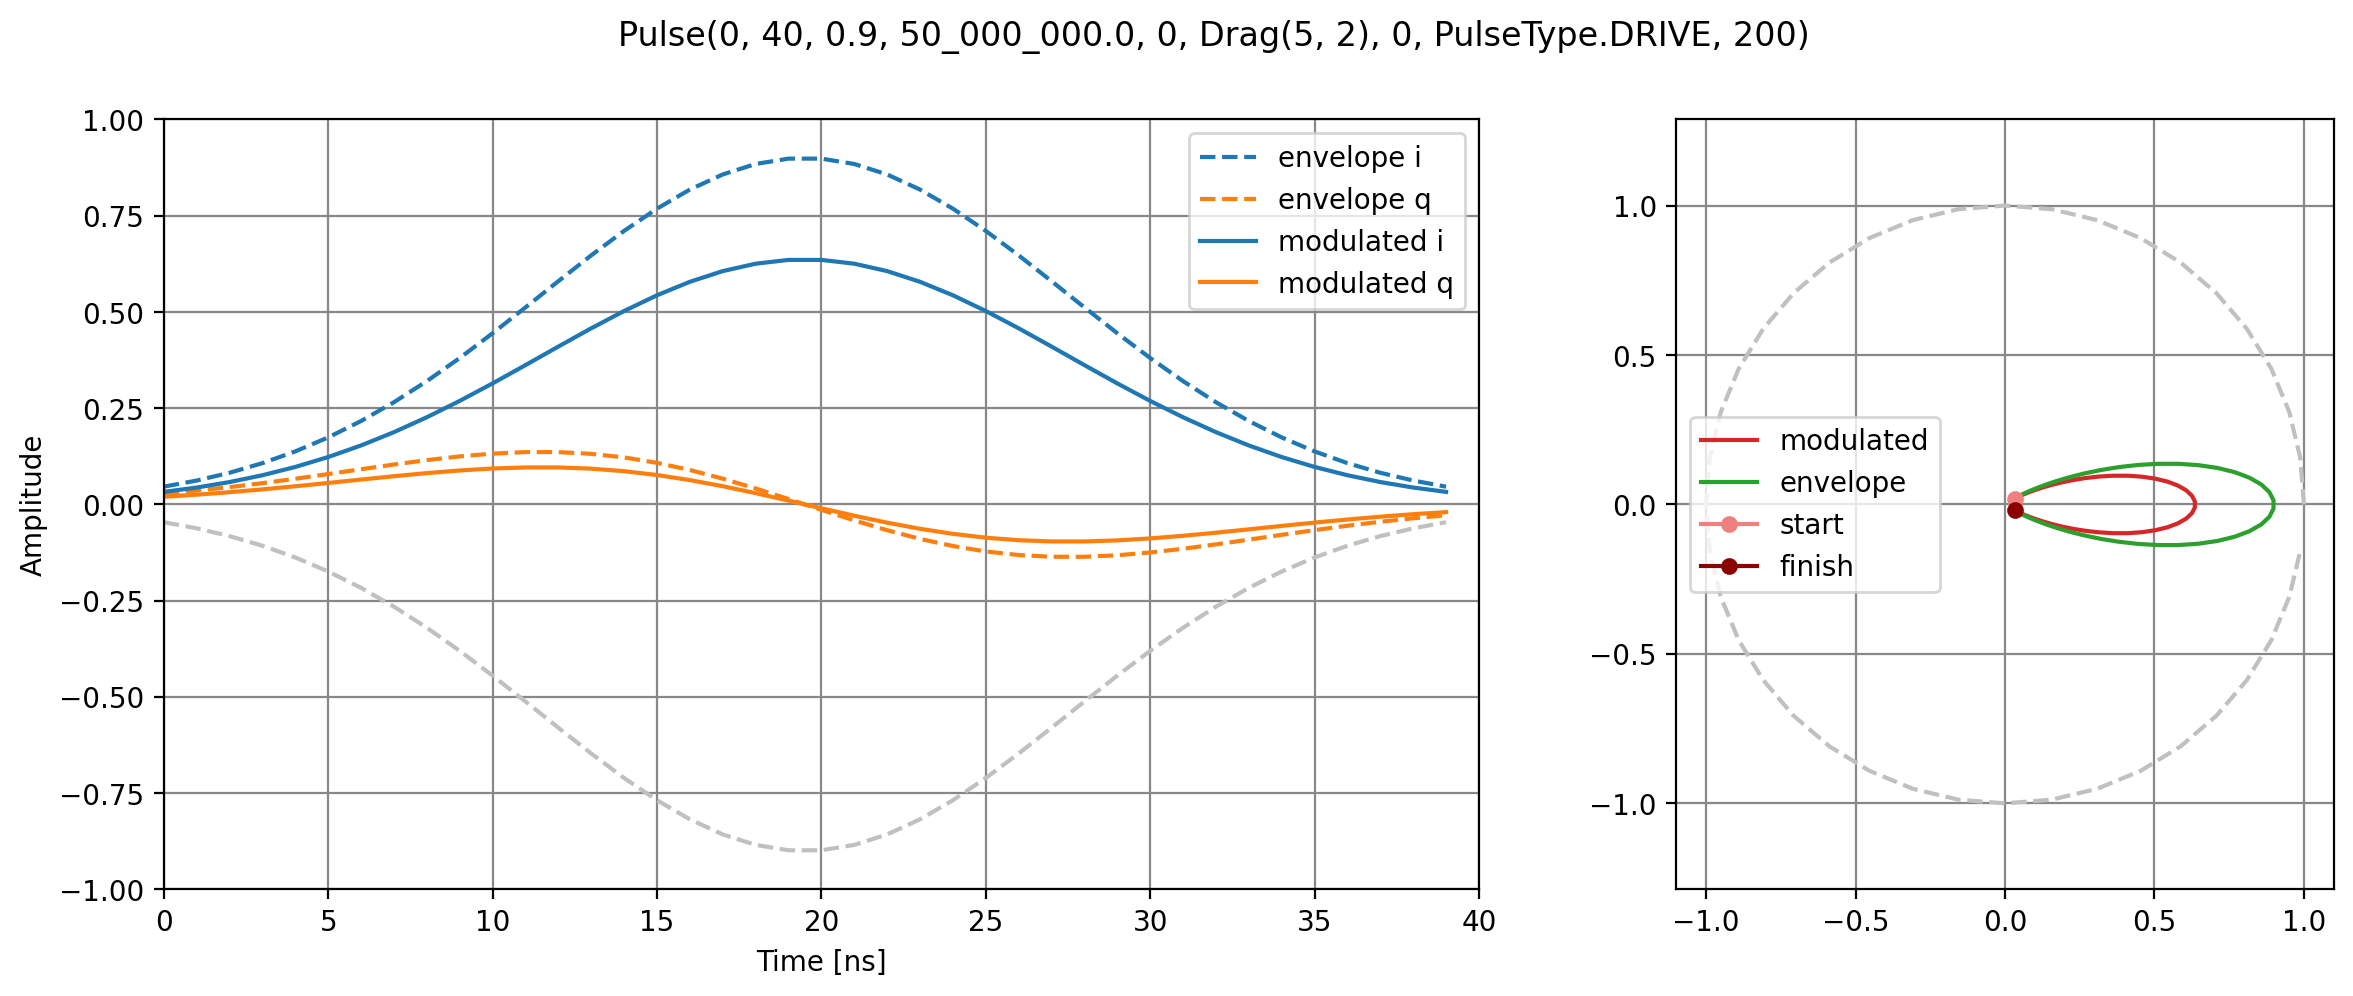

In [13]:
drag_pulse = Pulse(0, 40, 0.9, 50e6, 0, Drag(5,2), 0, PulseType.DRIVE, 200)
drag_pulse.plot()

Pulse `serial` is a string representation of the pulse. It can be used as is to generate a copy of the pulse: 

In [14]:
p1 = Pulse(0, 40, 0.9, 50_000_000, 0, Gaussian(5), 0, PulseType.DRIVE)
assert p1.serial == 'Pulse(0, 40, 0.9, 50_000_000, 0, Gaussian(5), 0, PulseType.DRIVE, 0)'
p2 = eval(p1.serial)
assert p1 == p2

#### ReadoutPulse, DrivePulse & FluxPulse Aliases

These objects are subclasses of the Pulse object. They have a different representation, and in their instantiation one does not require to specify the type.

In [15]:
rop = ReadoutPulse(start = 0,
            duration = 50, 
            amplitude = 0.9, 
            frequency = 20_000_000, 
            relative_phase = 0.0, 
            shape = Rectangular(), 
            channel = 0, 
            qubit = 0)
assert repr(rop) == 'ReadoutPulse(0, 50, 0.9, 20_000_000, 0, Rectangular(), 0, 0)'
assert isinstance(rop, Pulse)

dp = DrivePulse(start = 0,
            duration = 2000, 
            amplitude = 0.9, 
            frequency = 200_000_000, 
            relative_phase = 0.0, 
            shape = Gaussian(5), 
            channel = 0, 
            qubit = 0)
assert repr(dp) == 'DrivePulse(0, 2000, 0.9, 200_000_000, 0, Gaussian(5), 0, 0)'
assert isinstance(rop, Pulse)

fp = FluxPulse(start = 0,
            duration = 300, 
            amplitude = 0.9, 
            shape = Rectangular(), 
            channel = 0, 
            qubit = 0)

assert repr(fp) == 'FluxPulse(0, 300, 0.9, Rectangular(), 0, 0)'
assert isinstance(rop, Pulse)

### PulseShape

#### Overview

`PulseShape` objects are used to represent the different shapes a pulse can take. These objects are responsible for generating the waveforms based on the parameters of the pulse and the sampling rate set in the `PulseShape` class attribute `SAMPLING_RATE`.
All `PulseShape` objects support the generation of waveforms with an arbitrary sampling rate. This will be useful for whenever we use instruments that use a sampling rate different than 1e9 Hz.
The types of pulse shapes currently supported are `Rectangular()`, `Gaussian`, `Drag`

#### Sampling Rate

In [17]:
p14 = Pulse(0, 40, 0.9, 100e6, 0, Drag(5,1), 0, PulseType.DRIVE)

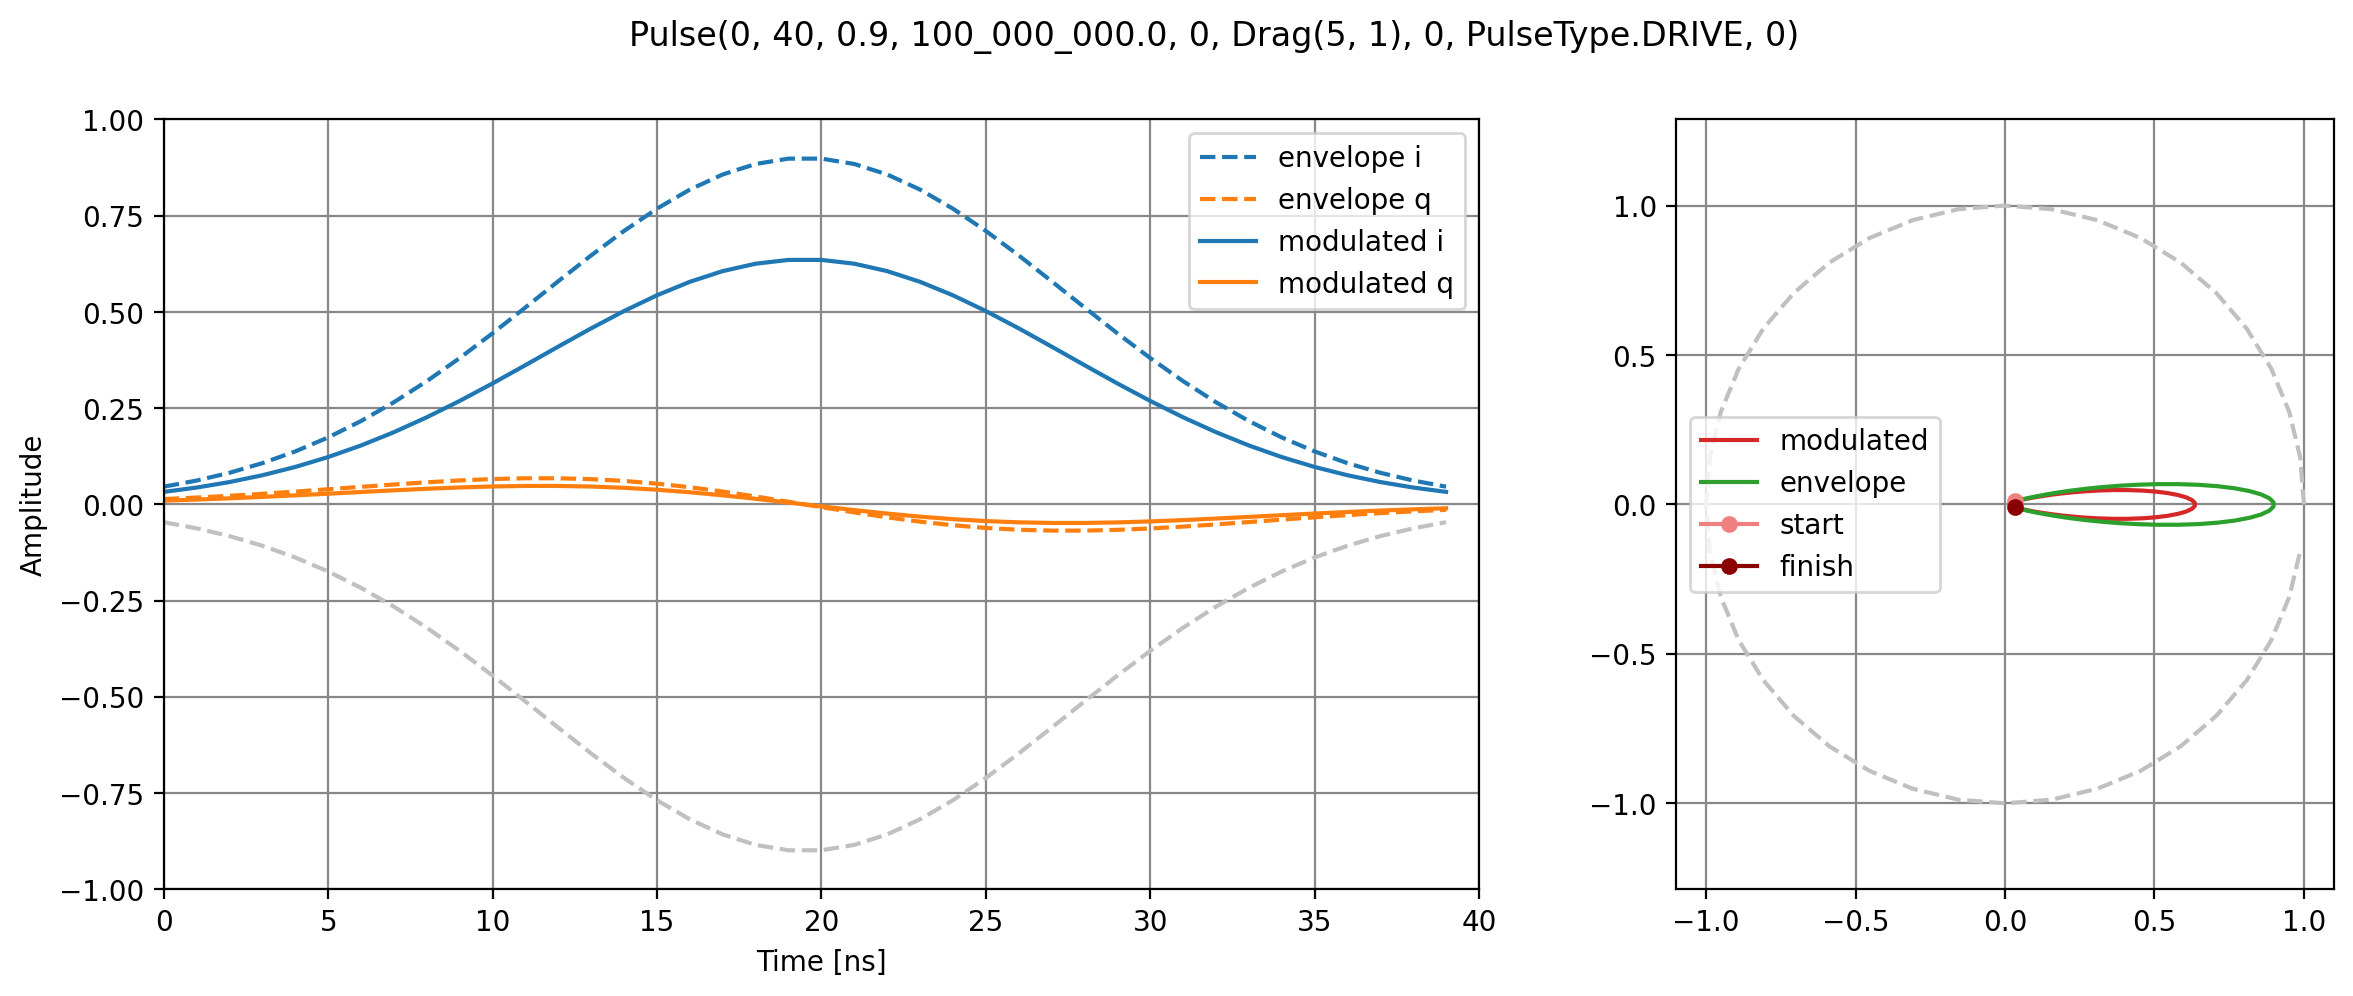

In [18]:
p14.plot(sampling_rate=1)

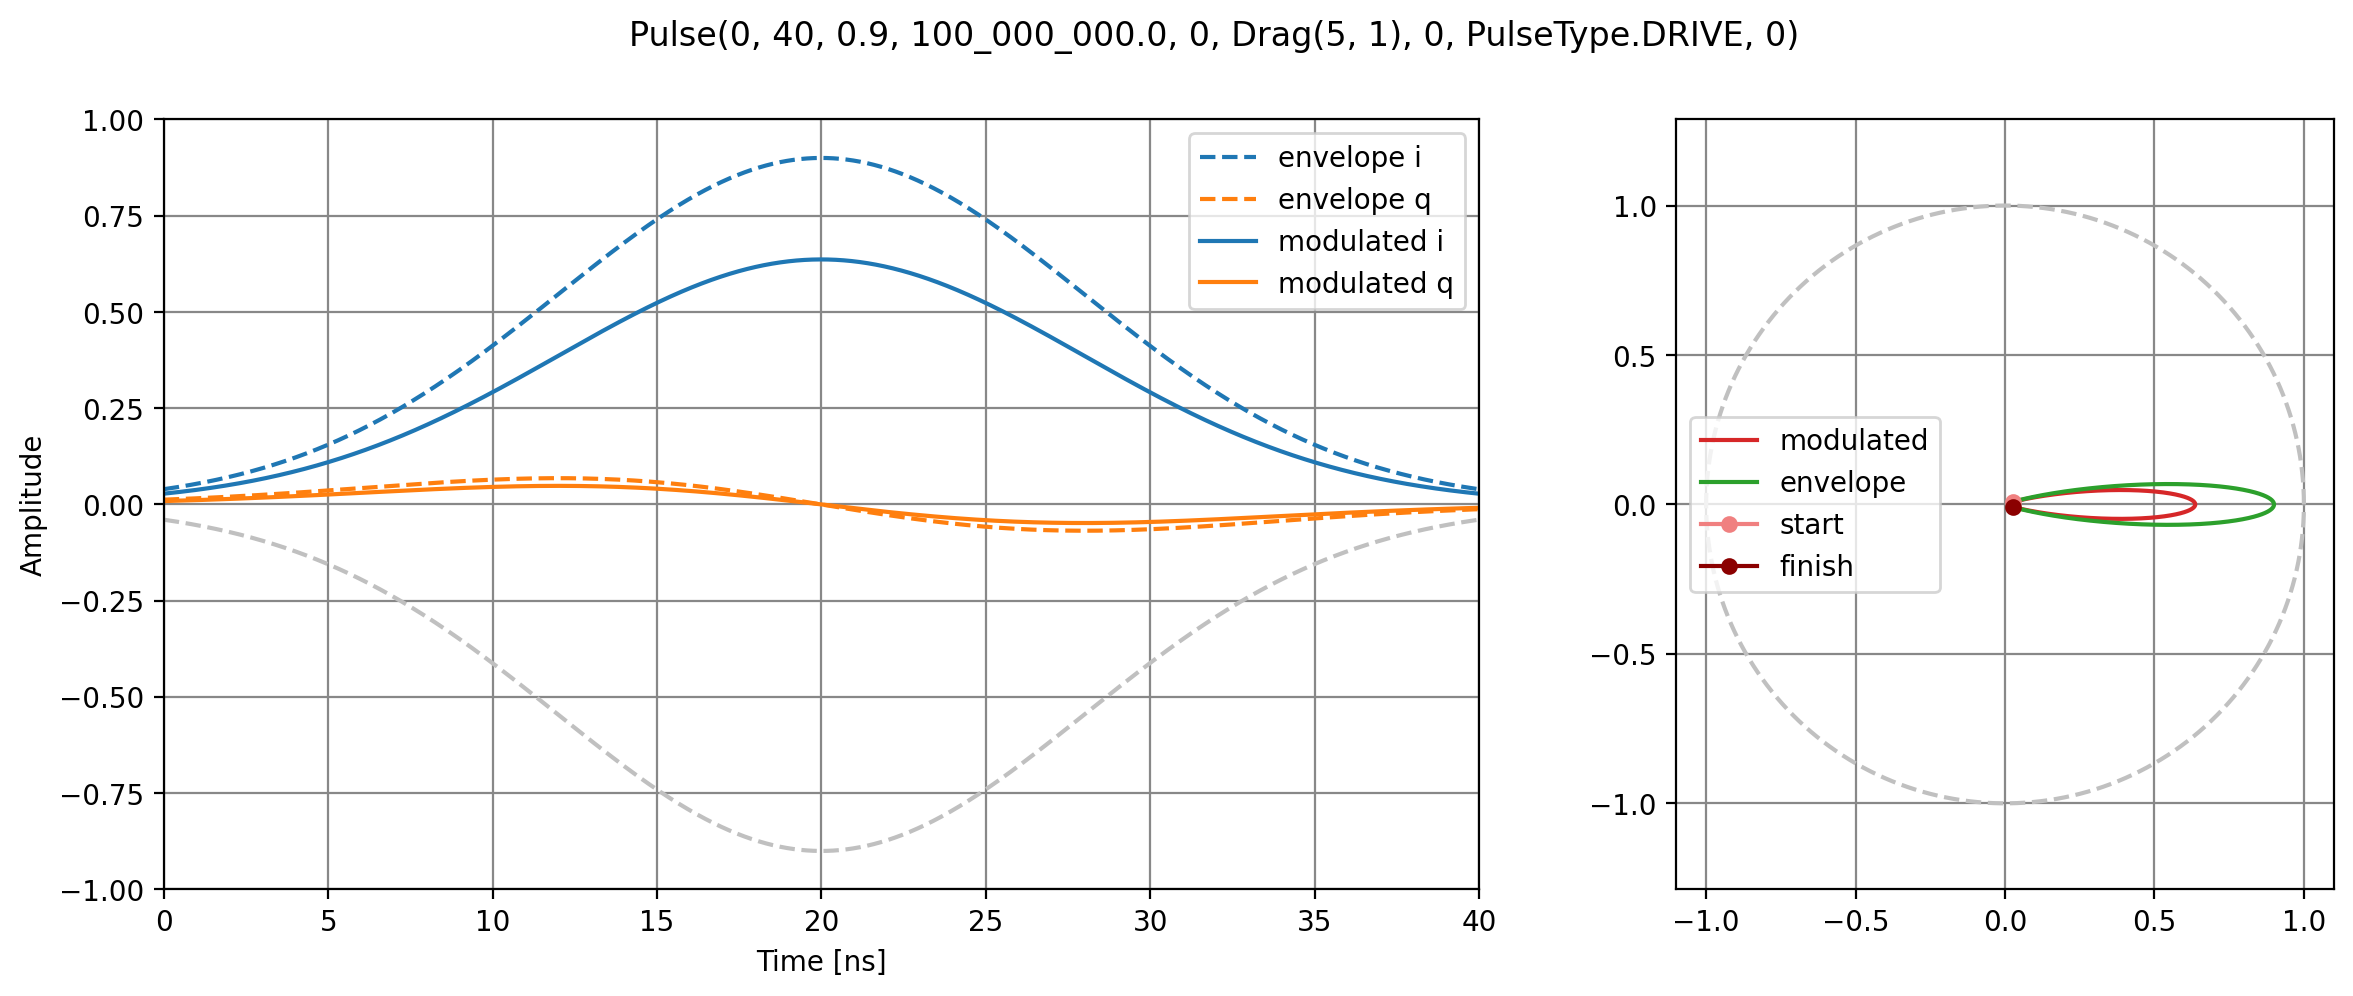

In [19]:
p14.plot(sampling_rate=100)

#### Drag Shape

This version of the driver includes a fix to the formula that generates the DRAG pulse.

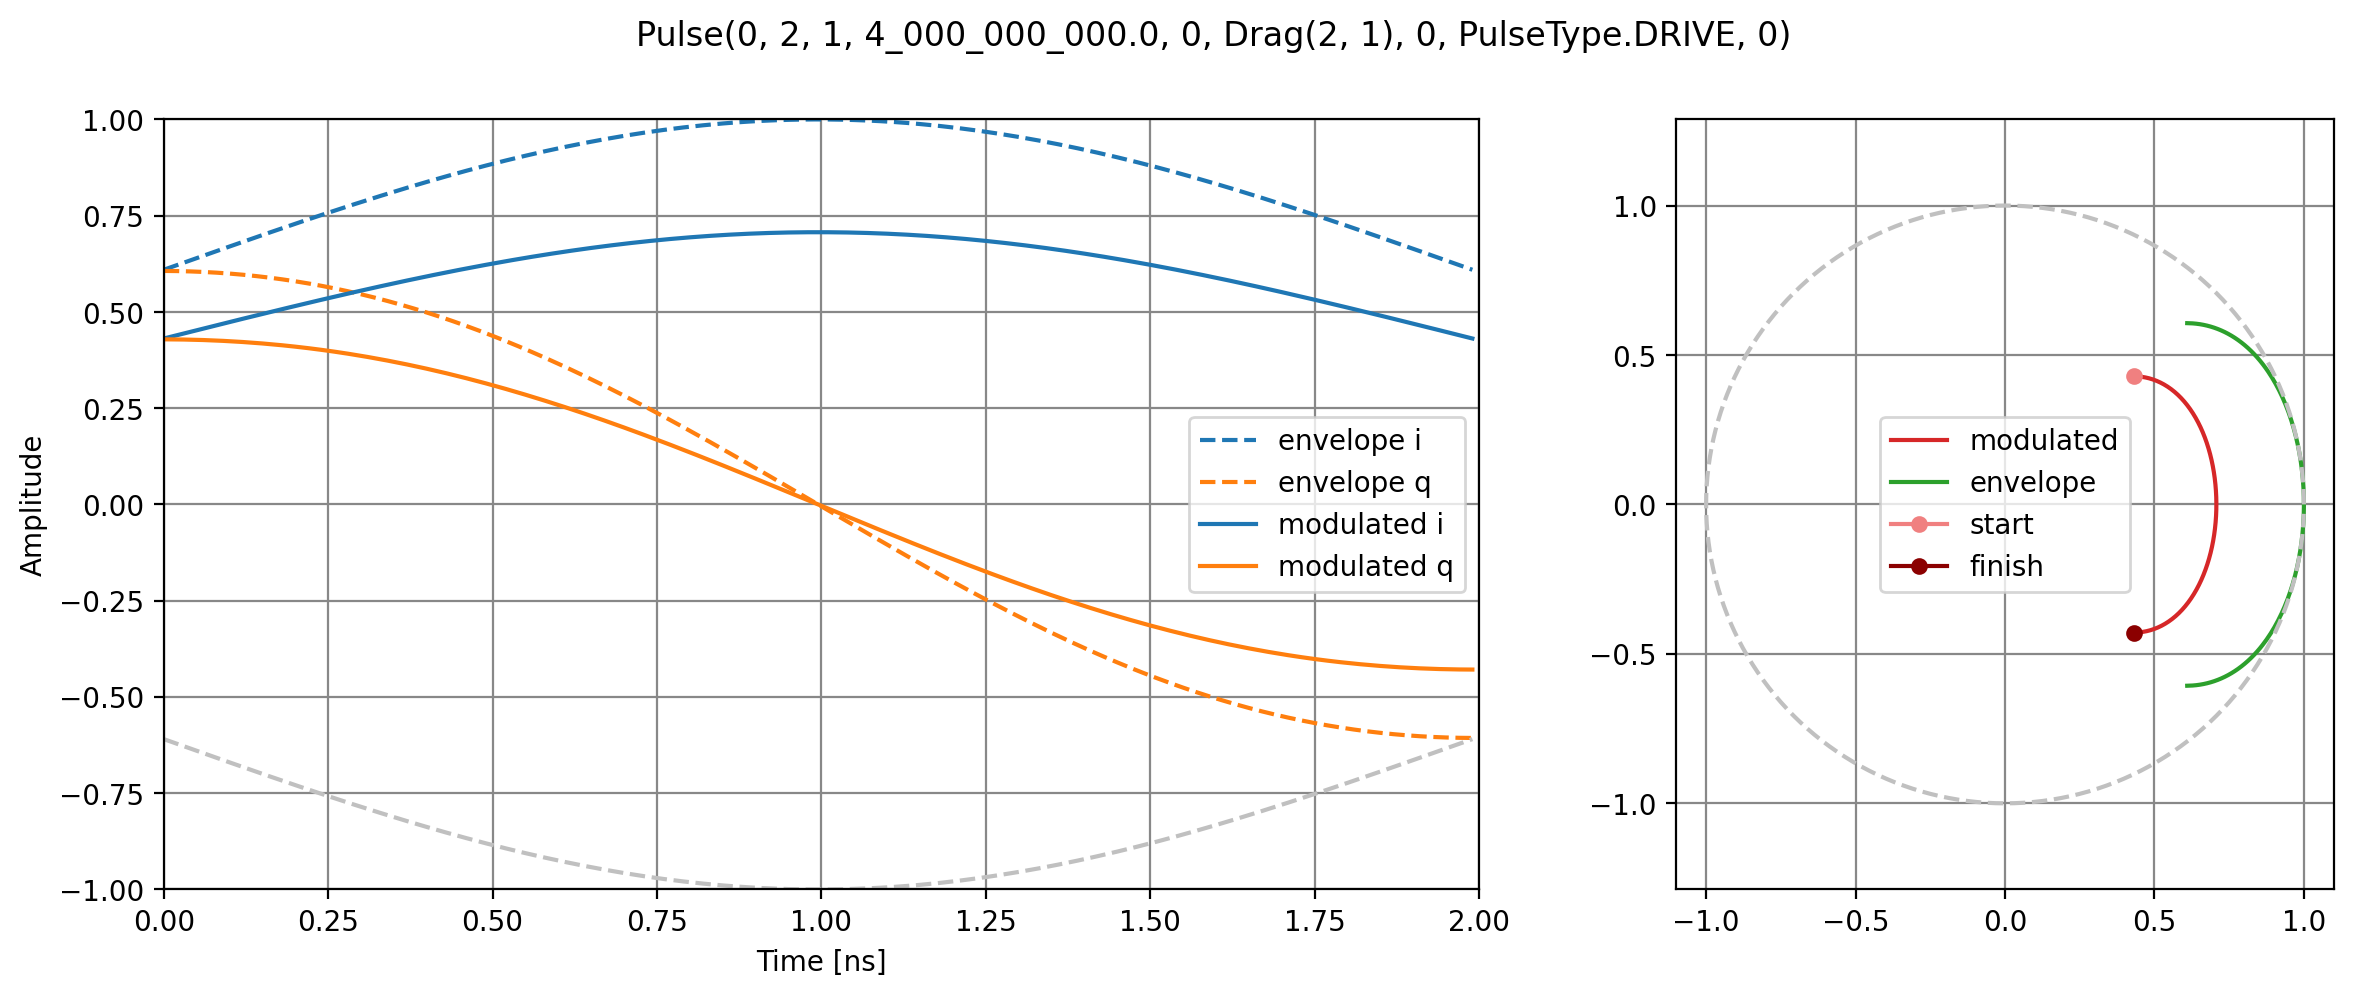

In [20]:
dp = Pulse(0, 2, 1, 4e9, 0, Drag(2,1), 0, PulseType.DRIVE)
dp.plot(sampling_rate=100)
# envelope i & envelope q should cross nearly at 0 and at 2

#### Sudden variant Net Zero

In [21]:
dp = FluxPulse(0, 40, 0.9, SNZ(t_half_flux_pulse=17, b_amplitude=0.8), 0, 200)
dp.plot()

TypeError: SNZ.__init__() got an unexpected keyword argument 't_half_flux_pulse'

#### Infinite Impulse Response (Filter) Shape

In [ ]:
b = [1, 2, 1]
a = [1, -1.5432913909679857, 0.6297148520559599]

# import numpy as np
# http://jaggedplanet.com/iir/iir-explorer.asp
# low pass
# b = np.array([1, 2, 1])
# a = np.flip(np.array([0.277023226134283,-0.7651127295946996,1]))
# high pass
# b = np.array([1, -2, 1])
# a = np.flip(np.array([0.7466573279103673,-1.7095165404698354,1]))

dp = FluxPulse(0, 80, 0.9, IIR(
                            b=b, 
                            a=a,
                            target=SNZ(t_half_flux_pulse=30, b_amplitude=1)), 
    0, 200)
dp.plot()

### eCap Pulse Shape

In [ ]:
dp = Pulse(0, 40, 0.9, 400e6, 0, eCap(alpha=2), 0, PulseType.DRIVE)
dp.plot(sampling_rate=100)

### Waveform

#### Overview

The `Waveform` object is used to hold the array of samples that make up a waveform. This simple class is hashable so that it allows the comparison of two `Waveforms`, which is later needed by the driver.
The class has a writable `serial` attribute that can be set externally.

In [ ]:
duration = 200 # ns
amplitude = 0.9 
num_samples = int(duration) # default sampling rate of 1GSps
waveform = Waveform(amplitude * np.ones(num_samples))
waveform.serial = f"Envelope_Waveform_I(num_samples = {num_samples}, amplitude = {format(amplitude, '.6f').rstrip('0').rstrip('.')}, shape = Rectangular())"
waveform.serial

### Pulse Sequence

#### Overview

One of the key enhancements introduced in this new version of the driver are those related to the `PulseSequence`. Previously, `PulseSequence` wasn't more than an a list to contain the sequence of pulses and two attributes to store the time and phase of the sequence.
The new version of `PulseSequence` introduces many features. It is a sorted collection of pulses with many auxiliary methods.

#### Initialisation

Multiple pulses can be used to initialise a `PulseSequence` or can be added to it:

In [ ]:
p1 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 1, PulseType.DRIVE)
p2 = Pulse(500, 40, 0.9, 100e6, 0, Drag(5,1), 2, PulseType.DRIVE)
p3 = Pulse(400, 40, 0.9, 100e6, 0, Drag(5,1), 3, PulseType.DRIVE)

In [ ]:
# initialise an empty PulseSequence
ps = PulseSequence()
assert type(ps) == PulseSequence

In [ ]:
# initialise a PulseSequence with multiple pulses at once
ps = PulseSequence(p1, p2, p3)
assert ps.count == 3 and len(ps) ==3
assert ps[0] == p1
assert ps[1] == p2
assert ps[2] == p3
# * please note that pulses are always sorted by channel first and then by their start time

In [ ]:
# initialise a PulseSequence with the sum of multiple pulses
other_ps = p1 + p2 + p3
assert other_ps.count == 3 and len(other_ps) ==3
assert other_ps[0] == p1
assert other_ps[1] == p2
assert other_ps[2] == p3
# * please note that pulses are always sorted by channel first and then by their start time

plist = [p1, p2, p3]
n = 0
for pulse in ps:
    assert plist[n] == pulse
    n += 1

In [ ]:
p4 = Pulse(300, 40, 0.9, 50e6, 0, Gaussian(5), 1, PulseType.DRIVE)
p5 = Pulse(200, 40, 0.9, 50e6, 0, Gaussian(5), 2, PulseType.DRIVE)
p6 = Pulse(100, 40, 0.9, 50e6, 0, Gaussian(5), 3, PulseType.DRIVE)


In [ ]:
# multiple pulses can be added at once
yet_another_ps = PulseSequence()
yet_another_ps.add(p4)
yet_another_ps.add(p5, p6)
assert yet_another_ps[0] == p4
assert yet_another_ps[1] == p5
assert yet_another_ps[2] == p6

#### Operators

PulseSequence support a number of operators(`==`, `!=`, `+`, `+=`, `*`, `*=`). Below are a few examples:

In [ ]:
ps += yet_another_ps
assert ps.count == 6
ps += ReadoutPulse(800, 200, 0.9, 20e6, 0, Rectangular(), 1)
ps = ps + ReadoutPulse(800, 200, 0.9, 20e6, 0, Rectangular(), 2)
ps = ReadoutPulse(800, 200, 0.9, 20e6, 0, Rectangular(), 3) + ps
assert ps.count == 9
print(ps)

In [ ]:
ps.plot()

`PulseSequence` now implements `__contains__()` so one can check if a `Pulse` is included in the `PulseSequence` likw so: 

In [ ]:
assert p5 in ps

#### Attributes & Methods

`PulseSequence` includes the following (read only) attributes:
- `pulses` a list containing the pulses of the sequence
- `serial`
- `count`
- `is_empty`
- `start`
- `finish`
- `duration`
- `channels`
- `pulses_overlap`
- `channels`
- `ro_pulses`
- `qd_pulses`
- `qf_pulses`


`PulseSequence` implements the following methods:
- `add()`
- `pop()`
- `remove()`
- `clear()`
- `shallow_copy()`
- `deep_copy()`
- `get_channel_pulses()`
- `get_pulse_overlaps()` returns a dictionary of time intervals with the list of pulses in it
- `separate_overlapping_pulses()`
- `plot()`

In [ ]:
p1 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 1, PulseType.DRIVE)
ps = PulseSequence(p1)
assert ps.count == 1
ps *= 3
assert ps.count == 3
ps *= 3
assert ps.count == 9

In [ ]:
p1 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 1, PulseType.DRIVE)
p2 = Pulse(600, 40, 0.9, 100e6, 0, Drag(5,1), 2, PulseType.DRIVE)
ps = 2 * p2 + p1 * 3
assert ps.count == 5

In [ ]:
ps.clear()
assert ps.count == 0
assert ps.is_empty

In [ ]:
p1 = Pulse(20, 40, 0.9, 200e6, 0, Drag(5,1), 1, PulseType.DRIVE)
p2 = Pulse(60, 1000, 0.9, 20e6, 0, Rectangular(), 2, PulseType.READOUT)
ps = p1 + p2
assert ps.start == p1.start
assert ps.finish == p2.finish


In [ ]:
p1 = DrivePulse(0, 400, 0.9, 20e6, 0, Gaussian(5), 10)
p2 = ReadoutPulse(100, 400, 0.9, 20e6, 0, Rectangular(), 30)
p3 = DrivePulse(300, 400, 0.9, 20e6, 0, Drag(5,50), 20)
p4 = DrivePulse(400, 400, 0.9, 20e6, 0, Drag(5,50), 30)
p5 = ReadoutPulse(500, 400, 0.9, 20e6, 0, Rectangular(), 20)
p6 = DrivePulse(600, 400, 0.9, 20e6, 0, Gaussian(5), 30)

ps = PulseSequence(p1, p2, p3, p4, p5, p6)
assert ps.channels == [10, 20, 30]
assert ps.get_channel_pulses(10).count == 1 
assert ps.get_channel_pulses(20).count == 2 
assert ps.get_channel_pulses(30).count == 3 

In [ ]:
ps.plot()

In [ ]:
assert ps.pulses_overlap == True
assert ps.get_channel_pulses(10).pulses_overlap == False
assert ps.get_channel_pulses(20).pulses_overlap == True
assert ps.get_channel_pulses(30).pulses_overlap == True

channel10_ps = ps.get_channel_pulses(10)
channel20_ps = ps.get_channel_pulses(20)
channel30_ps = ps.get_channel_pulses(30)

split_pulses = PulseSequence()
overlaps = channel20_ps.get_pulse_overlaps()
n = 0
for section in overlaps.keys():
    for pulse in overlaps[section]:
        sp = SplitPulse(pulse, section[0], section[1])
        sp.channel = n
        split_pulses.add(sp)
        n += 1
split_pulses.plot()



In [ ]:
n = 70
for segregated_ps in ps.separate_overlapping_pulses():
    n +=1
    for pulse in segregated_ps:
        pulse.channel = n
ps.plot()

In [ ]:
p1 = DrivePulse(t0, 400, 0.9, 20e6, 0, Gaussian(5), 10)
p2 = ReadoutPulse(p1.finish, 400, 0.9, 20e6, 0, Rectangular(), 30)
p3 = DrivePulse(p2.finish, 400, 0.9, 20e6, 0, Drag(5,50), 20)
ps1 = p1 + p2 + p3
ps2 = p3 + p1 + p2
assert ps1 == ps2

In [ ]:
hash(ps1)

In [ ]:
hash(ps2)

In [ ]:
for pulse in ps1.pulses:
    print(pulse.serial)

In [ ]:
for pulse in ps2.pulses:
    print(pulse.serial)

#### Overlaps

In [ ]:
overlaps